❓ What's your experience with machine learning?

## Machine Learning in Spark

[ Ref _Learning Spark v2_ book, _Chapter 10_.]

Spark has two machine learning packages: `spark.mllib` and `spark.ml`. `spark.mllib` is the original machine learning API, based on the RDD API (which has been in maintenance mode since Spark 2.0), while `spark.ml` is the newer API, based on DataFrames. In the remaining of the lesson, we'll focus on `spark.ml`.

❓ Why should we use Spark for our machine learning models?

With `spark.ml`, data scientists can use one ecosystem for their data preparation and model building, without the need to downsample their data to fit on a **single** machine.

❓ Ever used `scikit-learn`? Do you remember [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)s?

We'll start with an example and look at how to design machine learning pipelines in Spark. We'll cover

- Transformer
- Estimator
- Pipeline

In [0]:
filePath = "/databricks-datasets/learning-spark-v2/sf-airbnb/sf-airbnb-clean.parquet/"

df = spark.read.parquet(filePath)
display(df)

host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
t,moderate,t,1.0,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,2.0,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,10.0,Haight Ashbury,37.76669,-122.4525,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,10.0,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,2.0,Western Addition,37.77525,-122.43637,House,Entire home/apt,5.0,1.5,2.0,2.0,Real Bed,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,moderate,f,1.0,Western Addition,37.78471,-122.44555,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,2.0,31.0,90.0,9.0,8.0,10.0,10.0,9.0,9.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,strict_14_with_grace_period,t,2.0,Mission,37.75919,-122.42237,Condominium,Private room,3.0,1.0,1.0,2.0,Real Bed,1.0,647.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,1.0,Potrero Hill,37.76259,-122.40543,House,Private room,2.0,1.0,1.0,1.0,Real Bed,1.0,453.0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,moderate,f,1.0,Mission,37.75874,-122.41327,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,3.0,320.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,strict_14_with_grace_period,f,44.0,Haight Ashbury,37.77187,-122.43859,Apartment,Entire home/apt,3.0,1.0,3.0,3.0,Real Bed,30.0,37.0,89.0,9.0,9.0,10.0,9.0,9.0,9.0,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our goal is to predict the `price` per night of the apartment given the other features.

❓ How do we evaluate a model? Why do we split between train and test?

.

.

Before we begin feature engineering and modeling, we will divide our data set into two groups: _train_ and _test_. Depending on the size of your data set, your train/test ratio may vary, but many data scientists use 80/20 as a standard train/test split.

![Train test split](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

(_image by [Builtin](https://builtin.com/data-science/train-test-split)_)

Further, we will set a random seed for reproducibility, such that if we rerun this code we will get the same data points going to our train and test data sets, respectively. We can set it to any value, but we will use [42](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#The_Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_is_42).

In [0]:
trainDF, testDF = df.randomSplit([0.8, 0.2], seed=42)
print(
    f"""There are {trainDF.count()} rows in the training set,
    and {testDF.count()} in the test set"""
)

There are 5780 rows in the training set,
    and 1366 in the test set


In [0]:
display(
    df.select("bedrooms", "price")
    .where(df.price < 1000)
)

bedrooms,price
1.0,170.0
2.0,235.0
1.0,65.0
1.0,65.0
2.0,785.0
2.0,255.0
1.0,139.0
1.0,135.0
2.0,265.0
3.0,177.0


Now that we have split our data into training and test sets, let’s prepare the data to build a regression model predicting price given the number of bedrooms.

❓ What regression model should we start from?

.

.

.

Let's start with linear regression.

Linear regression requires that all the input features are contained within a **single vector** in your DataFrame. We will use [VectorAssembler](https://spark.apache.org/docs/latest/ml-features#vectorassembler), a transformer that combines a given list of columns into a single vector column.

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["bedrooms"], outputCol="features")
vector_train_df = assembler.transform(trainDF)
display(vector_train_df.select("bedrooms", "features", "price"))

bedrooms,features,price
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",200.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",130.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",95.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",250.0
3.0,"Map(vectorType -> dense, length -> 1, values -> List(3.0))",250.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",115.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",105.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",86.0
1.0,"Map(vectorType -> dense, length -> 1, values -> List(1.0))",100.0
2.0,"Map(vectorType -> dense, length -> 1, values -> List(2.0))",220.0


After setting up our `vectorAssembler`, we have our data prepared and transformed into a format that our linear regression model expects. In Spark, `LinearRegression` is a type of **estimator**:

- input: a `DataFrame`
- output: a `Model` object.

**Estimators** learn parameters from your data, have an `estimator_name.fit()` method, and are **actions** (i.e., kick off Spark jobs), whereas **transformers** are **lazily** evaluated.

In [0]:
from pyspark.ml.regression import LinearRegression

linear_regression = LinearRegression(featuresCol="features", labelCol="price")

model = linear_regression.fit(vector_train_df)
type(model)

Out[5]: pyspark.ml.regression.LinearRegressionModel

`.fit()` returns a `LinearRegressionModel`, which is a transformer. In other words, the output of an estimator’s fit() method is a transformer. Once the estimator has learned the parameters, the transformer can apply these parameters to new data points to generate predictions.

In [0]:
print(f"Coefficients: {model.coefficients}")
print(f"Intercept: {model.intercept}")

Coefficients: [123.6757463819947]
Intercept: 47.51023373378815


❓ What are these coefficients and intercept?

.

.

Now, we have our trained model.

❓ How can we run predictions on the _test_ set?

We may replicate the transformations done on the _train_ set.

In [0]:
vector_test_df = assembler.transform(testDF)
test_predictions = model.transform(vector_test_df)
display(test_predictions.select("features", "prediction", "price"))

features,prediction,price
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,85.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,45.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,70.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,128.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,159.0
"Map(vectorType -> dense, length -> 1, values -> List(2.0))",294.86172649777757,250.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,99.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,95.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,100.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,2010.0


/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
Out[8]: <AxesSubplot:xlabel='bedrooms', ylabel='prediction'>

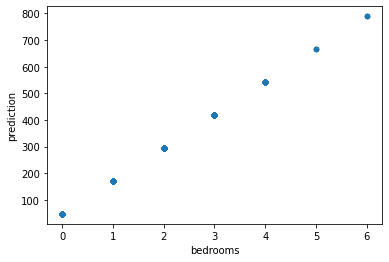

In [0]:
test_predictions.toPandas().plot.scatter(x='bedrooms', y='prediction')

Oftentimes data preparation pipelines will have multiple steps, and it becomes cumbersome to remember not only which steps to apply, but also the ordering of the steps. This is the motivation for the `Pipeline` API: you simply specify the stages you want your data to pass through, in order, and Spark takes care of the processing for you.

Let's repeat the fitting on the _train_ set using `Pipeline`s.

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(
    stages=[
        assembler, # our first transformer
        linear_regression # our estimator
    ]
)

model_from_pipeline = pipeline.fit(trainDF)

Another advantage of using the Pipeline API is that it determines which stages are _estimators_/_transformers_ for you, so you don’t have to worry about specifying `name.fit()` versus `name.transform()` for each of the stages.

Now, making a prediction on the test set is more straighforward.

In [0]:
test_predictions = model_from_pipeline.transform(testDF)
display(test_predictions.select("features", "prediction", "price"))

features,prediction,price
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,85.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,45.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,70.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,128.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,159.0
"Map(vectorType -> dense, length -> 1, values -> List(2.0))",294.86172649777757,250.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,99.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,95.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,100.0
"Map(vectorType -> dense, length -> 1, values -> List(1.0))",171.18598011578285,2010.0


### Categorical variables

So far, we trained our model on a single feature (`bedrooms`).

❓ What if we want to train the model on a categorical feature (eg `property_type`)?

In [0]:
display(df.select("bedrooms", "property_type", "price"))

bedrooms,property_type,price
1.0,Apartment,170.0
2.0,Apartment,235.0
1.0,Apartment,65.0
1.0,Apartment,65.0
2.0,House,785.0
2.0,Apartment,255.0
1.0,Condominium,139.0
1.0,House,135.0
2.0,Apartment,265.0
3.0,Apartment,177.0


To convert categorical values into numeric values, we can use a technique called [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). Let's look at values in our `property_type` categorical variable.

In [0]:
display(df.select("property_type").distinct().orderBy("property_type"))

property_type
Aparthotel
Apartment
Bed and breakfast
Boat
Boutique hotel
Bungalow
Cabin
Castle
Condominium
Cottage


Our `property_type` column has 23 unique values. Once encoded via one-hot encoding, we'd have 23 new features in our dataset, ie one per possible value of `property_type`.

If we had 300 different unique values of `property_type`, would one-hot encoding massively increase consumption of memory/compute resources? Not with Spark! Spark internally uses a `SparseVector` when the majority of the entries are 0, as is often the case after one-hot encoding, so it does not waste space storing 0 values.

Example of the representation

```
DenseVector(0, 0, 0, 7, 0, 2, 0, 0, 0, 0)
SparseVector(10, [3, 5], [7, 2])
```

Ok, then how do we one-hot encode our `property_type` column? There are a few ways to one-hot encode your data with Spark. A common approach is to use the `StringIndexer` and `OneHotEncoder`.

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(
    inputCols = ["property_type"],
    outputCols = ["property_type_index"],
    handleInvalid='skip'
)

# let's look at what the StringIndexer does
model_indexer = indexer.fit(trainDF) #it's actually an estimator
display(
    model_indexer.transform(trainDF).select("property_type", "property_type_index")
)

property_type,property_type_index
House,1.0
Apartment,0.0
Guest suite,3.0
Apartment,0.0
House,1.0
House,1.0
Condominium,2.0
House,1.0
Apartment,0.0
House,1.0


With this approach, the first step is to apply the `StringIndexer` estimator to convert categorical values into category indices. These category indices are ordered by label frequencies, so the most frequent label gets index 0, which provides us with reproducible results across various runs of the same data.

In [0]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(
    inputCols = ["property_type_index"],
    outputCols = ["property_type_ohe"]
)

# let's look at what OneHotEncoder does

df_after_indexing = model_indexer.transform(trainDF)
model_encoder = encoder.fit(df_after_indexing)
display(
    model_encoder.transform(df_after_indexing).select("property_type", "property_type_index", "property_type_ohe")
)

property_type,property_type_index,property_type_ohe
House,1.0,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))"
Apartment,0.0,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))"
Guest suite,3.0,"Map(vectorType -> sparse, length -> 24, indices -> List(3), values -> List(1.0))"
Apartment,0.0,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))"
House,1.0,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))"
House,1.0,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))"
Condominium,2.0,"Map(vectorType -> sparse, length -> 24, indices -> List(2), values -> List(1.0))"
House,1.0,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))"
Apartment,0.0,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))"
House,1.0,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))"


Once you have created your category indices, you can pass those as input to the `OneHotEncoder`. The OneHotEncoder maps a column of category indices to a column of binary vectors.

Ok, now, let's build again our vector that is the vector input to our linear regression

In [0]:
assembler = VectorAssembler(
    inputCols = ["bedrooms", "property_type_ohe"],
    outputCol = "features"
)

# define again our regressor
linear_regression = LinearRegression(
    labelCol="price",
    featuresCol="features"
)

We can now define our `Pipeline` combining `StringIndexer`, `OneHotEncoder`, `VectorAssembler`, and `LinearRegression`.

In [0]:
pipeline = Pipeline(
    stages=[
        indexer,
        encoder,
        assembler,
        linear_regression
    ]
)

model = pipeline.fit(trainDF)
predictions = model.transform(testDF)
display(
    predictions.select("bedrooms", "property_type", "property_type_ohe", "price", "prediction")
)

bedrooms,property_type,property_type_ohe,price,prediction
1.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",85.0,139.13137354029107
1.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",45.0,139.13137354029107
1.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",70.0,139.13137354029107
1.0,Apartment,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))",128.0,162.2192045045291
1.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",159.0,139.13137354029107
2.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",250.0,267.57795653624703
1.0,Apartment,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))",99.0,162.2192045045291
1.0,Apartment,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))",95.0,162.2192045045291
1.0,Apartment,"Map(vectorType -> sparse, length -> 24, indices -> List(0), values -> List(1.0))",100.0,162.2192045045291
1.0,House,"Map(vectorType -> sparse, length -> 24, indices -> List(1), values -> List(1.0))",2010.0,139.13137354029107


### Evaulating our model

❓ How would you evaluate a regression model?

.

.

We'll use root mean squared error (RMSE).

\\(\sqrt{\frac{1}{n} \\sum^n_i{(y_i - \widehat{y_i})^2}}\\)

Do you know other alternative metrics? What about mean absolute error (MAE)?

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="price",
    metricName="rmse"
)

print(
    "RMSE ", evaluator.evaluate(predictions)
)

RMSE  218.98180237048047


❓ How do we know if this score is low or high?

.

.

We could use a baseline model, ie a model that predicts the averagae price of the training set regardless of the features of each record. An alternative is to use a metric that naturally gives an intuition of how your're doing with respect to a baseline, ie _R squared_ (R2).

$$R^2  = 1 - \frac{SS_{res}}{SS_{tot}}$$

where \\(SS_{tot}\\) is the total sum of squares if you always predict \\(\overline{y}\\), ie the average `price` in our case:

$$SS_{tot} = \\sum^n_i{(y_i - \overline{y})^2}$$

and \\(SS_{res}\\) is the sum of residuals squared from your model predictions:

$$SS_{res} = \\sum^n_i{(y_i - \widehat{y_i} )^2}$$

If your model perfectly predicts every datapoint, then \\(SS_{res} = 0\\), making \\(R^2=1\\). And if \\(SS_{res} = SS_{tot}\\), then the fraction is \\(\frac{1}{1}\\), making \\(R^2=0\\).

When can \\(R^2\\) be lower than zero? What does it mean?

In [0]:
evaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="price",
    metricName="r2"
)

print(
    "R2 ", evaluator.evaluate(predictions)
)

R2  0.1724292155402991


## Saving and loading models

In [0]:
pipeline.write().overwrite().save("/models/linear_regression_pipeline")

In [0]:
%fs ls  /models/linear_regression_pipeline

path,name,size,modificationTime
dbfs:/models/linear_regression_pipeline/metadata/,metadata/,0,0
dbfs:/models/linear_regression_pipeline/stages/,stages/,0,0


In [0]:
# we can load the model again via...
saved_pipeline = Pipeline.load("/models/linear_regression_pipeline")
saved_pipeline

Out[35]: Pipeline_c652b592a44a

## Exercise

Build a random forest (`RandomForestRegressor`) to predict the `price` of the apartments based on

- `bedrooms`
- `cancellation_policy`
- `number_of_reviews`

You can train the model on the _training_ set and make predictions on the _test_ set.

Goal

1. compute RMSE and R2  on the test set
2. what is the importance of the features?

PS Does a random forest actually need one-hot encoding of categorical vaiables?